**Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, stats
from math import sqrt
from numpy import mean, var

**Reading the data as a data frame**

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [5]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Shape of the data

In [6]:
df.shape

(1338, 7)

Data type of each attribute

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking the presence of missing values

In [8]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

5 point summary of numerical attributes

In [10]:
# 5-number summary

from numpy import percentile

# quartiles

New_df = df.loc[:,['age']]

quartiles = percentile(New_df, [25, 50, 75])

# calculate min/max

df_min , df_max = New_df.min(), New_df.max()

# Printing 5-numbers summary

print('Min:\n', df_min)
print('....'*10)
print('Q1: \n', quartiles[0])
print('Median: \n', quartiles[1])
print('Q3: \n', quartiles[2])
print('....'*10)
print('Max: \n', df_max)

Min:
 age    18
dtype: int64
........................................
Q1: 
 27.0
Median: 
 39.0
Q3: 
 51.0
........................................
Max: 
 age    64
dtype: int64


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of 'bmi', 'age' and 'charges' columns

In [12]:
# Selecting 'bmi', 'age' and 'charges' columns

Dist_df = df.loc[:, ['bmi', 'age', 'charges']]
Dist_df.head()

,bmi,age,charges
0,27.900,19,16884.92400
1,33.770,18,1725.55230
2,33.000,28,4449.46200
3,22.705,33,21984.47061
4,28.880,32,3866.85520


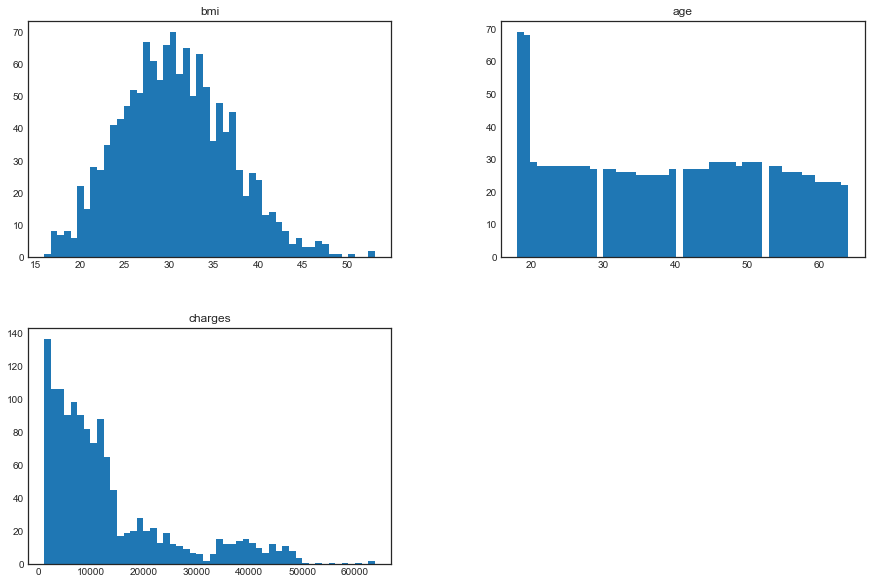

In [21]:
# Histogram of selected columns

plt.style.use('seaborn-white')
Dist_df.hist(bins=50, figsize=(15,10), grid=False)
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

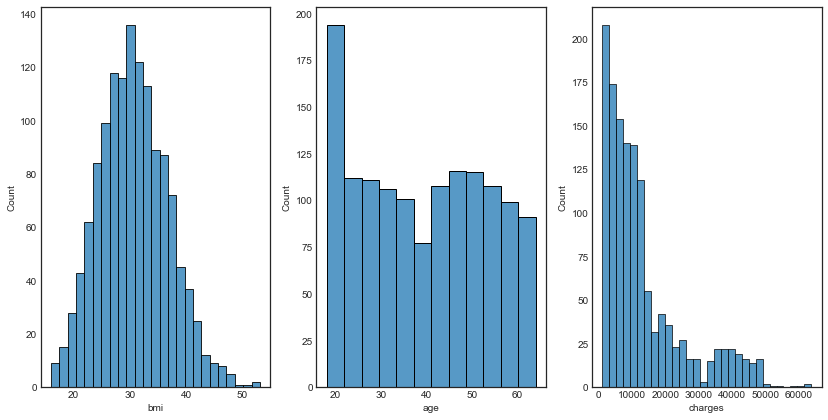

In [49]:
# For better visualization

fig, axs = plt.subplots(1, 3, figsize=(14, 7))

sns.histplot(Dist_df['bmi'], ax=axs[0])
sns.histplot(Dist_df['age'], ax=axs[1])
sns.histplot(Dist_df['charges'], ax=axs[2])



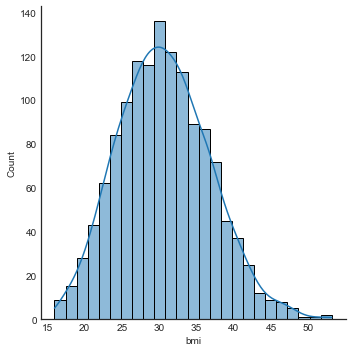

In [51]:
sns.displot(Dist_df['bmi'], kde=True)

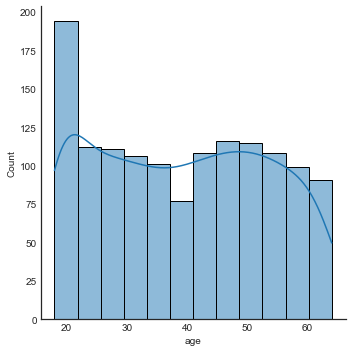

In [52]:
sns.displot(Dist_df['age'], kde=True)

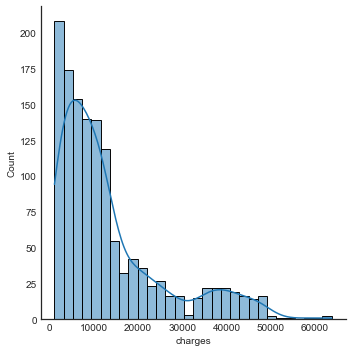

In [53]:
sns.displot(Dist_df['charges'], kde=True)

Measure of skewness of 'bmi', 'age' and 'charges' columns

Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

Distribution of categorical columns (include children)

Pair plot that includes all the columns of the data frame

Do charges of people who smoke differ significantly from the people who don't?

Does bmi of males differ significantly from that of females?

Is the proportion of smokers significantly different in different genders?

Is the distribution of bmi across women with no children, one child and two children, the same?